# Heart disease detection :

Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient

## Plan
----
### EDA :
----
 **Analysis of the shape :**

* Identification of the target : 

* Number of rows and columns  : 

* Variables type : 

* Identification of missing values : 
 

 **Substantive analysis :**

* Target visualization : 

* Understanding the different variables :

* Visualization of relations : features/Target :

* Identification of outliers :

### Preprocessing :
----
* Creation of the Train Set / Test Set
* Removal of NaN : dropna(), imputation, "empty" column
* Encoding
* Removal of outliers harmful to the model 
* Feature selection
* Feature engineering
* Feature scaling

### Modeling :
----
* Define an evaluation function
* Training of different model
* Optimization
* Error analysis and return to Preprocessing / EDA
* Learning curve and Decision Making

### Objectif :
----

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "data/heart_data.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Analysis :
* Age :
The mean of the age is 54, which means the big part of people are adult
* Sex :
mean = 0.68 which means there is more men than women

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Number of rows and columns :

In [6]:
df.shape

(303, 14)

### Variables type :

In [7]:
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [10]:
df.columns[df.dtypes == "float64"]

Index(['oldpeak'], dtype='object')

 Only one column (oldpeak) is float

### Identification of missing values :
Here I will do a sns plot to identify missing values 

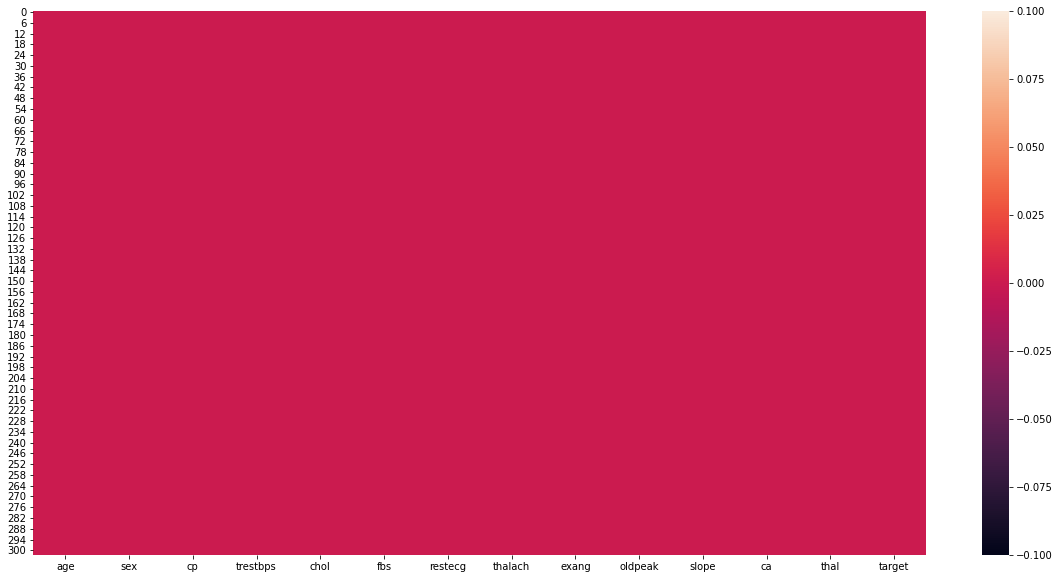

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna())

All the plot is colored, there is no particular lines, so there is no missing values. We could also run df.info(), and It will give us how many non null values for each variable

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Target visualisation :
The target is a categorical variable : 
* 1 : heart disease
* 2 : no heart disease
<br/>

I will plot the histogram to see how It is distributed

In [24]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

So there is more people that have heart disease than those who don't have it.

Text(0.5, 1.0, 'The distribution of the target variable')

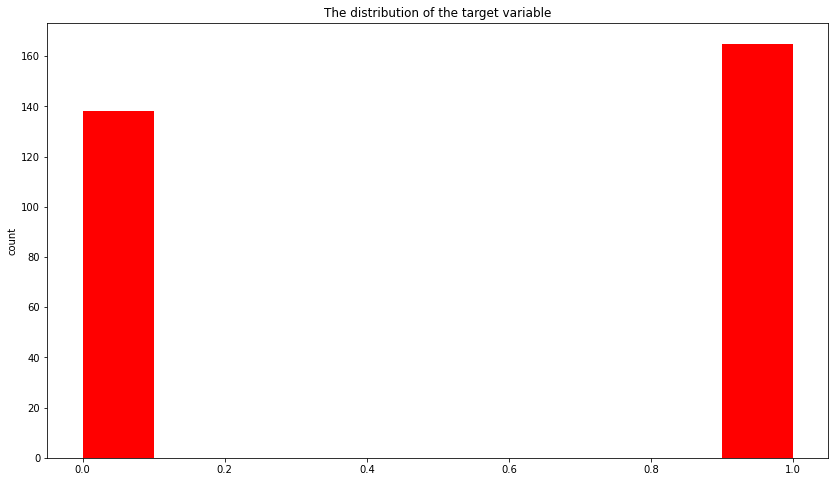

In [27]:
plt.figure(figsize=(14, 8))
plt.hist(df.target, color='r')
plt.ylabel("count")
plt.title("The distribution of the target variable")

## Understanding the different variables :
I will split my variables into continous and categorical variables so that I can use the appropriate plot.

In [36]:
categorical_variables = []
continous_variables = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_variables.append(column)
    else:
        continous_variables.append(column)

### Continous variables :

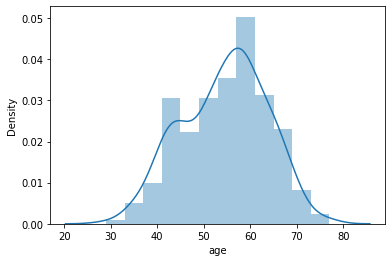

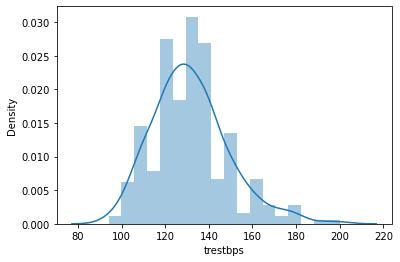

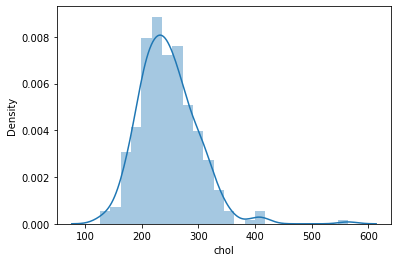

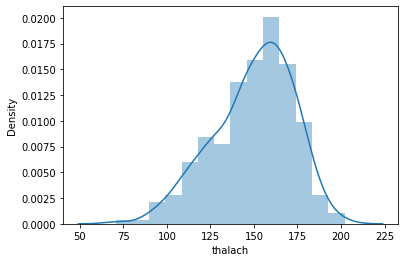

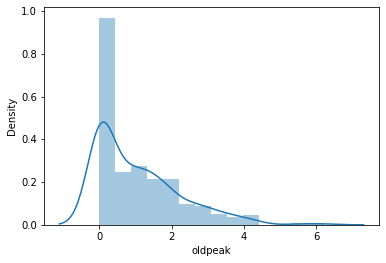

In [38]:
for column in continous_variables:
    plt.figure()
    sns.distplot(df[column])

### Categorical variables :

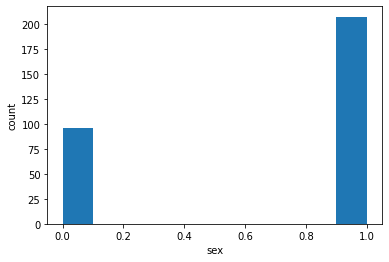

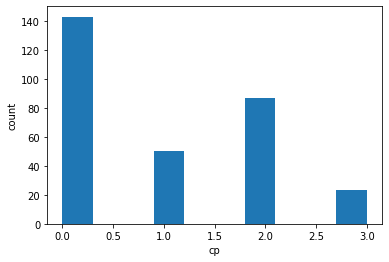

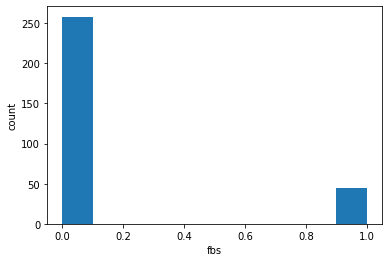

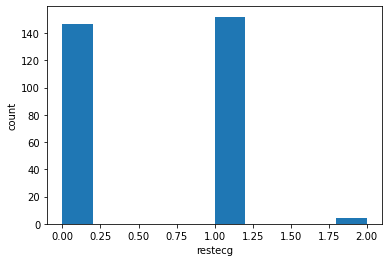

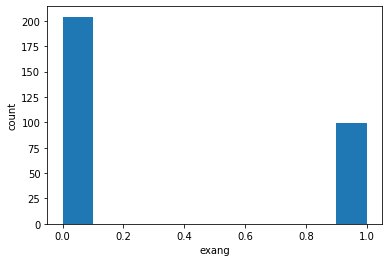

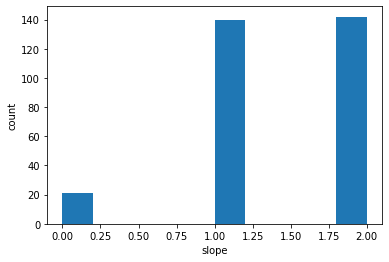

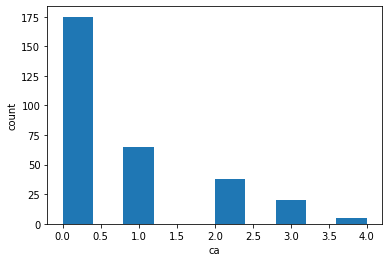

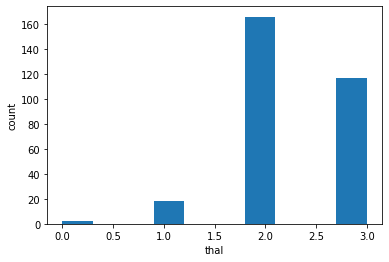

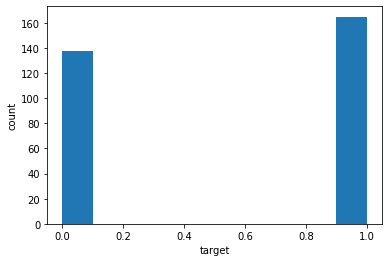

In [42]:
for column in categorical_variables:
    plt.figure()
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('count')

### Analysis :
* age, trestbps seem to have a normal distribution
* chol and thalach are skewed
* 

## Relation target / variables :

In [43]:
sick = df[df['target'] == 1]
not_sick = df[df['target'] == 0]

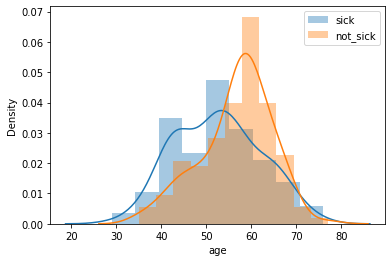

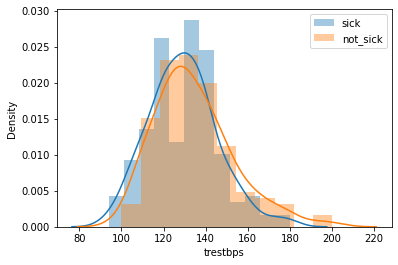

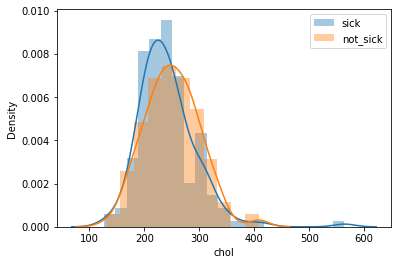

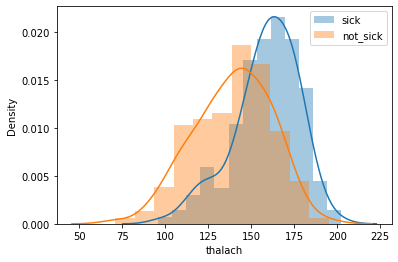

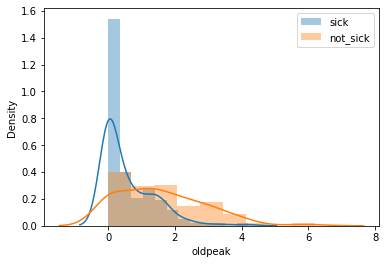

In [44]:
for column in continous_variables:
    plt.figure()
    sns.distplot(sick[column], label='sick')
    sns.distplot(not_sick[column], label='not_sick')
    plt.legend()

As we can see, the distributions of the two
categories (sick and not sick) are different
for some variables and equal for other
variables. To confirm this, I will do a
statistic test (scipy.stats.ttest_ind) that
Calculate the T-test for the means of two
independent samples of scores.
### Null hypothesis :
* H0 = Average rates are EQUAL in sick and not sick individuals

In [53]:
from scipy.stats import ttest_ind

sick.sample(not_sick.shape[0])
def t_test(column):
    alpha = 0.02
    stat, p = ttest_ind(not_sick[column].dropna(), sick[column].dropna())
    if p < alpha:
        return 'H0 rejected'
    else :
        return 0

In [54]:
for column in continous_variables:
    print(f'{column :-<50} {t_test(column)}')

age----------------------------------------------- H0 rejected
trestbps------------------------------------------ H0 rejected
chol---------------------------------------------- 0
thalach------------------------------------------- H0 rejected
oldpeak------------------------------------------- H0 rejected


We conclude that only levels of cholesterol are equals for sick and non sick people.

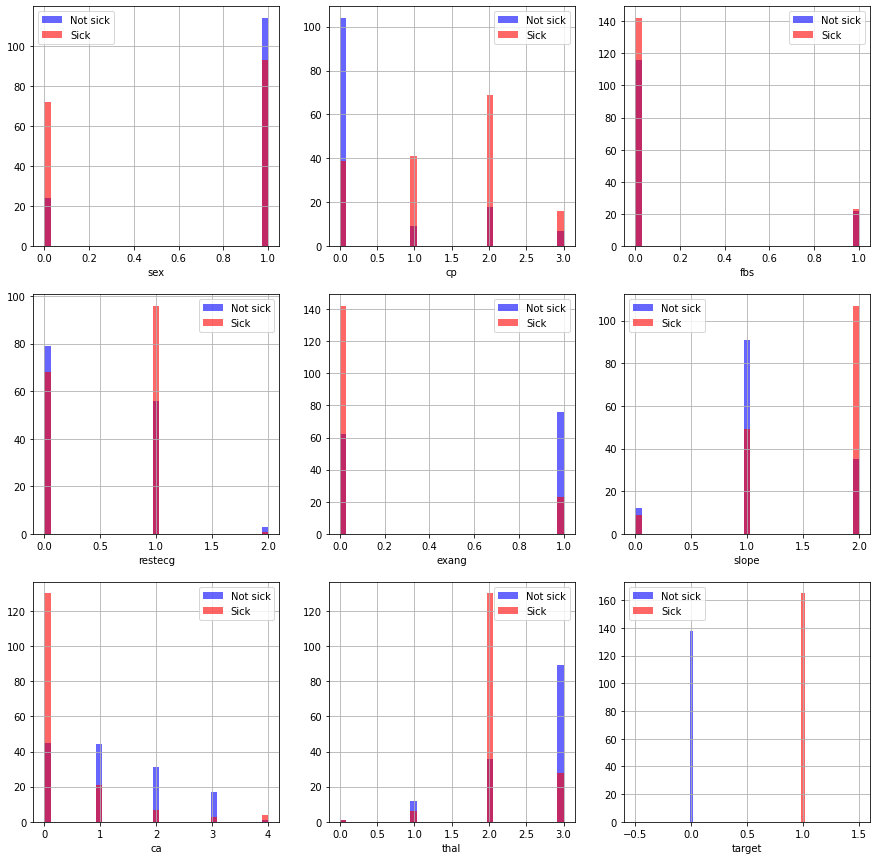

In [50]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    not_sick[column].hist(bins=35, color='blue', label='Not sick', alpha=0.6)
    sick[column].hist(bins=35, color='red', label='Sick', alpha=0.6)
    plt.legend()
    plt.xlabel(column)